In [1]:
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../../")
from  CommonFunc import *
DataPreprocessing.plotSetting()
## Data Fetching
data_folder_path="./데이터파일"
start_data ,end_data =2,3
Analysis_title(f"{start_data}-{end_data} 번 파일 데이터 보고 분석 by Forrest.D.Park")
data_dict=DataPreprocessing.data_fetch(data_folder_path,start_data,end_data)
for i in range(len(data_dict.keys())):
    data_num= sorted(data_dict.keys())[i]
    print(yellow(f"\n\n{data_num} 파일의 데이터 프레임.tail() "))
    # 화면 가운데 정렬하여 출력
    df_display_centered(DataPreprocessing.key_selector(data_dict, i).tail())
    # DataPreprocessing.dataInfo2(DataPreprocessing.key_selector(data_dict,i))

◎ 현재 경로의 폴더 목록 --
  0. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/데이터파일
  1. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/사진
◎ 주피터 가상환경 체크 : base
◎ Python 설치 경로:/opt/anaconda3/bin/python
◎ Graph 한글화 Setting
◎ OS platform 한글 세팅완료
✻✻✻✻______👻 2-3 번 파일 데이터 보고 분석 by Forrest.D.Park 👻______✻✻✻✻


Data File 불러오는 중..:  1%|          | 1/100 [elapsed: 00:02 remaining: 04:54]



2.여성가족부_아이돌봄 누적아동실적현황-서비스시간대별 정보 서비스_20240612.xlsx 파일의 데이터 프레임.tail() 


,기준연월,아이돌봄기관번호,아이돌봄기관명,질병서비스여부,돌봄구분명,서비스다양화명,상위아이돌봄기관번호,상위아이돌봄기관명,총건수,시간0_2시작건수,시간2_4시작건수,시간4_6시작건수,시간6_8시작건수,시간8_10시작건수,시간10_12시작건수,시간12_14시작건수,시간14_16시작건수,시간16_18시작건수,시간18_20시작건수,시간20_22시작건수,시간22_24시작건수,데이터기준일자
37688,202404,C0451,칠곡군가족센터,N,종일제,일반형,C0506,경상북도 광역거점,442,0,0,0,1,115,168,100,0,57,1,0,0,20240612
37689,202404,C0451,칠곡군가족센터,Y,시간제,일반형,C0506,경상북도 광역거점,60,0,0,0,9,8,5,7,5,26,0,0,0,20240612
37690,202404,C0381,하남시 가족센터,N,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,39400,0,0,374,8954,2611,2077,3224,4362,14087,3364,304,43,20240612
37691,202404,C0381,하남시 가족센터,N,종일제,일반형,C0498,경기도 아이돌봄광역지원센터,1415,0,0,0,128,297,232,298,377,63,20,0,0,20240612
37692,202404,C0381,하남시 가족센터,Y,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,30,0,0,0,5,6,4,1,4,9,1,0,0,20240612


In [2]:
test = DataPreprocessing.key_selector(data_dict, 0)
df_display_centered(test.tail(3))


,기준연월,아이돌봄기관번호,아이돌봄기관명,질병서비스여부,돌봄구분명,서비스다양화명,상위아이돌봄기관번호,상위아이돌봄기관명,총건수,시간0_2시작건수,시간2_4시작건수,시간4_6시작건수,시간6_8시작건수,시간8_10시작건수,시간10_12시작건수,시간12_14시작건수,시간14_16시작건수,시간16_18시작건수,시간18_20시작건수,시간20_22시작건수,시간22_24시작건수,데이터기준일자
37690,202404,C0381,하남시 가족센터,N,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,39400,0,0,374,8954,2611,2077,3224,4362,14087,3364,304,43,20240612
37691,202404,C0381,하남시 가족센터,N,종일제,일반형,C0498,경기도 아이돌봄광역지원센터,1415,0,0,0,128,297,232,298,377,63,20,0,0,20240612
37692,202404,C0381,하남시 가족센터,Y,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,30,0,0,0,5,6,4,1,4,9,1,0,0,20240612


In [3]:
print(test['기준연월'].unique())

## 시간대별 데이터를 보는 함수 

def plot_by_timeline(df, time_col_word='시간',group_by_col =['기준연월']):
    
    time_columns = [col for col in df.columns if time_col_word in col]
    # print(time_columns)

    # 시간대별 데이터 그룹화
    grouped_df_sum = df.groupby(group_by_col)[time_columns].sum().reset_index()  
    grouped_df_mean = df.groupby(group_by_col)[time_columns].mean().reset_index()  
    df_display_centered(grouped_df_sum.head(3))

   

    

    
    return(df[time_columns])
    
    
# plot_by_timeline(test, time_col_word='시간',group_by_col =['기준연월'])

[202001 202003 202004 202005 202006 202007 202008 202009 202010 202011
 202012 202101 202102 202103 202104 202105 202106 202107 202108 202109
 202110 202111 202112 202201 202202 202203 202204 202205 202206 202207
 202208 202209 202210 202211 202212 202301 202302 202303 202304 202305
 202306 202307 202308 202309 202310 202311 202312 202401 202402 202403
 202404]


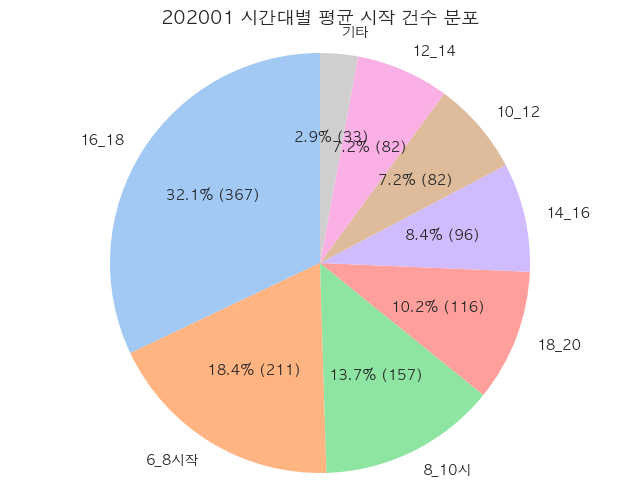

In [10]:
df = test[test['기준연월'] == 202001]
# plot_by_timeline(test_a, time_col_word='시간',group_by_col =['기준연월'])

def pie_plot(df):
    import matplotlib.pyplot as plt
    import seaborn as sns, pandas as pd
    plt.figure(figsize=(8, 6))  # 그래프 크기 설정

    # 시간대별 시작 건수 합계 계산
    time_columns = [col for col in df.columns if '시작건수' in col]
    time_sums = df[time_columns].mean()

    # 상위 8개 이외의 값을 "기타"로 합치기
    top_8_index = time_sums.nlargest(7).index
    other_sum = time_sums[~time_sums.index.isin(top_8_index)].sum()
    time_sums = pd.concat([time_sums[top_8_index], pd.Series({'기타': other_sum})])  # concat 사용

    # 레이블 설정 및 자르기
    labels = time_sums.index.tolist()
    for i, label in enumerate(labels):
        if len(str(label)) > 6:
            labels[i] = label[2:7] + ""

    # 색상 팔레트 설정
    colors = sns.color_palette("pastel", len(time_sums.values))

    # 퍼센트와 실제 수치 함께 표시하는 함수
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}% ({val:d})'
        return my_autopct

    # 파이 차트 그리기
    plt.pie(time_sums.values, labels=labels, autopct=make_autopct(time_sums.values), startangle=90, colors=colors)
    plt.title(f"202001 시간대별 평균 시작 건수 분포", fontsize=13)
    plt.axis('equal')  # 파이 차트를 원형으로 유지
    plt.show()  # 그래프 출력
pie_plot(df)

In [ ]:
df =test
import matplotlib.pyplot as plt
import seaborn as sns,pandas as pd

# 시간대별 시작 건수 칼럼만 선택
time_columns = [col for col in df.columns if '시간' in col and '시작건수' in col]

# 시간대별 시작 건수 합산
import pandas as pd

# time_columns 에는 시간대를 나타내는 컬럼 이름들이 포함되어 있다고 가정합니다. 


# 시간대별 합계 계산
time_sum = df[time_columns].sum()

# 시간대별 평균 계산
time_mean = df[time_columns].mean()

# 시간대별 합계와 평균을 하나의 DataFrame으로 합치기
result_df = pd.DataFrame({"합계": time_sum, "평균": time_mean})

# 결과 출력
df_display_centered(result_df)
# 그래프 그리기
# plt.figure(figsize=(12, 6))
# sns.barplot(x=time_data.index, y=time_data.values, palette="viridis")

# # 그래프 제목 및 레이블 추가
# plt.title('시간대별 돌봄 서비스 사용 패턴')
# plt.xlabel('시간대')
# plt.ylabel('총 건수')

# # x축 라벨 회전
# plt.xticks(rotation=45)

# # 그래프 표시
# plt.show()

,합계,평균
시간0_2시작건수,436991,11.593426
시간2_4시작건수,98459,2.612130
시간4_6시작건수,783974,20.798928
시간6_8시작건수,59071469,1567.173454
시간8_10시작건수,36322402,963.637864
시간10_12시작건수,18388728,487.855252
시간12_14시작건수,21118301,560.271164
시간14_16시작건수,25284255,670.794445
시간16_18시작건수,93378000,2477.330008
시간18_20시작건수,26406869,700.577534
